In [1]:
import smbus2
import time
#use this to read all the I2C 
#devices of the sensors connected

bus = smbus2.SMBus(1) # 1 indicates /dev/i2c-1
arduino_mega_address = 9
MIN_DELAY = 0

#motors 1,4,6 are on the right side
#motors 2,3,5 are on the left side
def control_motors(motor_values):
    motor_command = 1
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(MIN_DELAY)
    
def set_motor(index,percent=10,duration=1):
    motor_command = 1
    motor_values= [127,127,127,127,127,127]
    motor_values[index] = motor_values[index] + percent
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
    
def forward_left_motors(percent=10,duration=1):
    motor_command = 1
    motor_values= [127,127+percent,127+percent,127,127+percent,127]
    
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
    
def reverse_left_motors(percent=10,duration=1):
    motor_command = 1
    motor_values= [127,127-percent,127-percent,127,127-percent,127]
    
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
    
def forward_right_motors(percent=10,duration=1):
    motor_command = 1
    motor_values= [127+percent,127,127,127+percent,127,127+percent]
    
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
    
def reverse_right_motors(percent=10,duration=1):
    motor_command = 1
    motor_values= [127-percent,127,127,127-percent,127,127-percent]
    
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
        

def forward(percent=10,duration=1):
    motor_command = 1
    motor_values= [127+percent,127+percent,
                   127+percent,127+percent,
                   127+percent,127+percent]
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
def reverse(percent=10,duration=1):
    motor_command = 1
    motor_values= [127-percent,127-percent,
                   127-percent,127-percent,
                   127-percent,127-percent]
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
    
def turn(percent=10,duration=1):
    motor_command = 1
    motor_values= [127+percent,127-percent,
                   127-percent,127+percent,
                   127-percent,127+percent]
    
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(duration)
    stop()
    
    
def stop():
    motor_command = 1
    motor_values= [127,127,127,127,127,127]
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(0.01)
    
def set_servos(servo1=100,servo2=90,servo3=50,servo4=90):
    motor_command = 2
    '''
    byte servoByte1 = 100; wrist
    byte servoByte2 = 90; claw
    byte servoByte3 = 50; lift
    byte servoByte4 = 50; main lift
    '''
    motor_values= [servo1,servo2,servo3,servo4]
    bus.write_i2c_block_data(arduino_mega_address,
                             motor_command,
                             motor_values) 
    time.sleep(0.01)
    
def read_sensor_readings():
    data = bus.read_i2c_block_data(arduino_mega_address, 192, 10)
    #time.sleep(0.01)
    return data
#forward(40,3)
#reverse(10,2)
# for i in range(6):
#     set_motor(i,40)
#forward_left_motors(50)
#forward_right_motors(50)
#reverse_right_motors(50)


In [2]:
try:
    forward(127,5)
    #reverse(127,2)
except OSError:
    print("I/O ERROR failed")
    stop()
finally:
    stop()

In [3]:
for i in range(60):
    set_servos(servo1=90+i,servo2=90-i,servo3=50,servo4=80+i)
    time.sleep(0.05)

In [ ]:
turn(-70,0.5)

In [ ]:
forward(-100,0.5)

In [19]:
current_level_list = []
time_list = []
time_start = time.time()
try:
    for i in range(400):
        data = read_sensor_readings()
        print(data[4])
        current_level_list.append(data[4])
        time_list.append(time.time()-time_start)
        if i == 50:
            motor_values = [127,127,127,127,0,127]
            control_motors(motor_values)
        if i == 100:
            motor_values = [127,127,127,127,200,127]
            control_motors(motor_values)
except OSError:
    print("I/O ERROR, failed")
    read_sensor_readings()
    print(data[4])
finally:
    stop()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
16
12
8
7
6
6
4
5
5
4
5
4
4
3
5
3
4
3
4
4
3
4
3
4
4
3
4
3
4
4
3
4
3
4
4
3
4
4
4
5
3
4
4
4
4
3
5
4
4
4
9
29
4
14
16
7
1
8
1
1
9
3
6
0
8
0
2
2
5
1
1
5
3
4
2
3
0
3
5
4
3
5
0
2
0
5
0
3
3
4
0
0
3
3
4
1
2
3
2
4
3
5
0
4
0
0
3
0
0
0
5
5
0
4
4
0
4
1
0
0
1
1
3
0
1
0
1
0
0
0
2
0
0
0
0
4
5
0
0
0
3
0
0
1
0
0
1
0
0
3
0
3
0
3
3
1
1
2
2
2
0
2
3
4
0
0
3
0
0
4
0
2
1
2
0
1
3
1
0
5
3
5
0
0
0
0
2
3
4
0
1
0
1
0
0
4
0
0
0
3
3
4
4
0
0
3
1
2
0
2
3
0
0
2
2
0
3
0
0
1
0
0
0
0
1
2
0
2
4
2
3
2
5
0
3
0
0
0
0
3
3
0
4
3
0
0
0
3
3
5
3
0
0
0
0
3
5
0
3
3
0
2
6
3
2
4
0
1
0
1
2
0
2
1
3
1
2
1
3
0
3
0
2
0
0
0
0
5
0
0
1
0
1
0
4
1
2
1
5
0
0
0
0
0
0
5
0
0
0
0
1
1
0
3
1
2
4
3
1
1
0
2
3
0
4
0
1
3
0
0
2
2
3
2
1
2
0
3
0
0
2
5
0
3
0
0
0
0
0


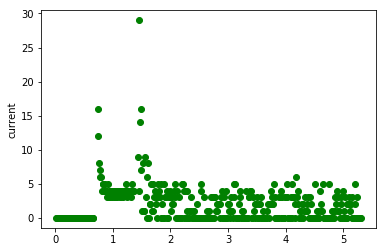

In [20]:
import matplotlib
import matplotlib.pyplot as plt

#graph the battery data and 5v voltage
plt.plot(time_list,current_level_list,'go')
plt.ylabel('current')
plt.show()

In [25]:
stop()

In [ ]:
try:
    forward(50)
    turn(-50,0.5)
    forward(50)
    turn(-50,0.5)
    forward(50)
    turn(-50,0.5)
    forward(50)
finally:
    stop()